In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmaps of AUC

In [4]:
data = pd.read_csv("../data/interim/valid_results.csv")
data

,training_set,valid_set,class,fold,auc
0,NormalDataset,Normal,cardiomegaly,0,0.907119
1,NormalDataset,Normal,pneumonia,0,0.808970
2,NormalDataset,Normal,atelectasis,0,0.849742
3,NormalDataset,Normal,pneumothorax,0,0.881774
4,NormalDataset,Normal,effusion,0,0.941520
...,...,...,...,...,...
620,OnlyLungBBDataset_0,OnlyLungBB,cardiomegaly,4,0.908679
621,OnlyLungBBDataset_0,OnlyLungBB,pneumonia,4,0.790169
622,OnlyLungBBDataset_0,OnlyLungBB,atelectasis,4,0.850319
623,OnlyLungBBDataset_0,OnlyLungBB,pneumothorax,4,0.813105


In [5]:
mean_auc_per_class = data.groupby(["class","training_set","valid_set"])["auc"].mean()

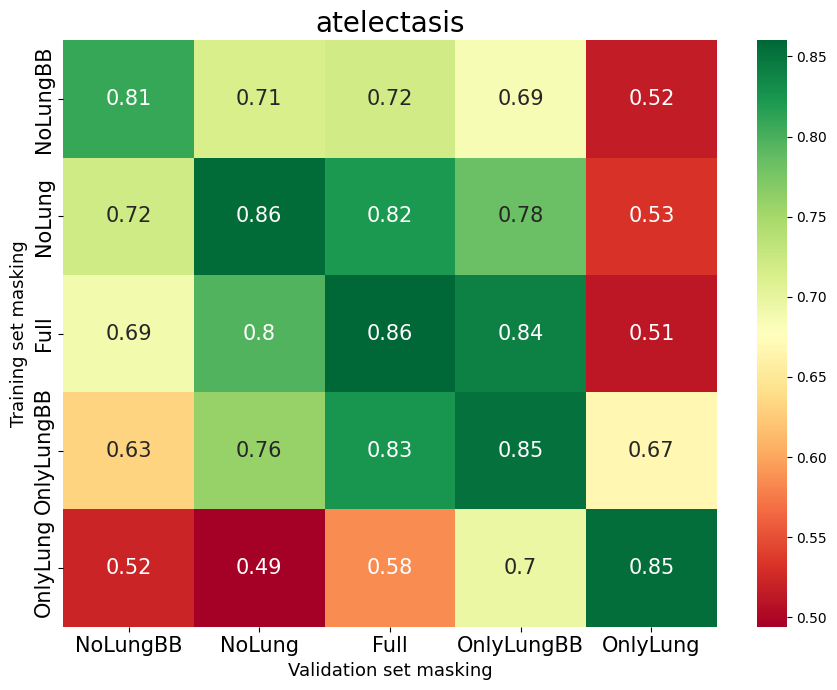

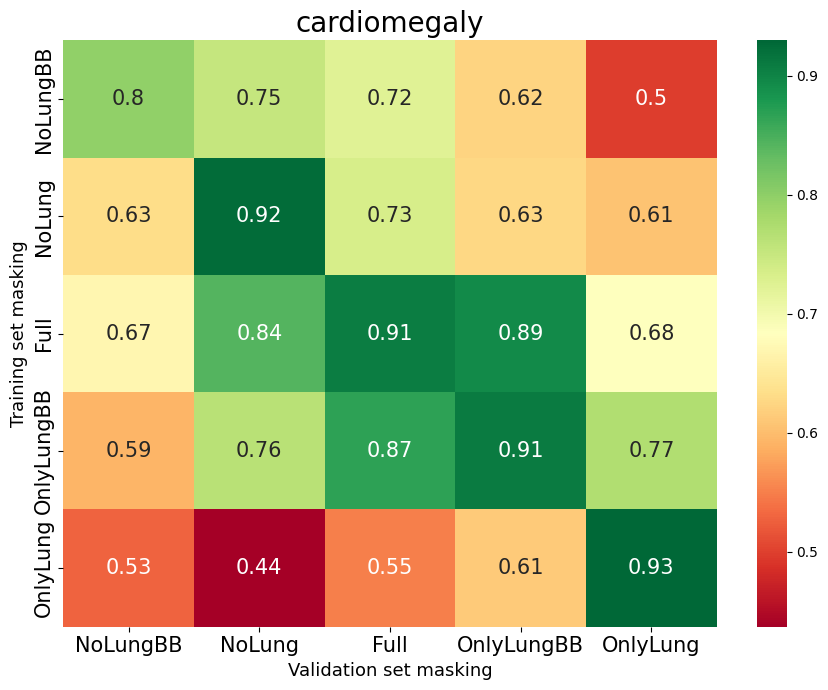

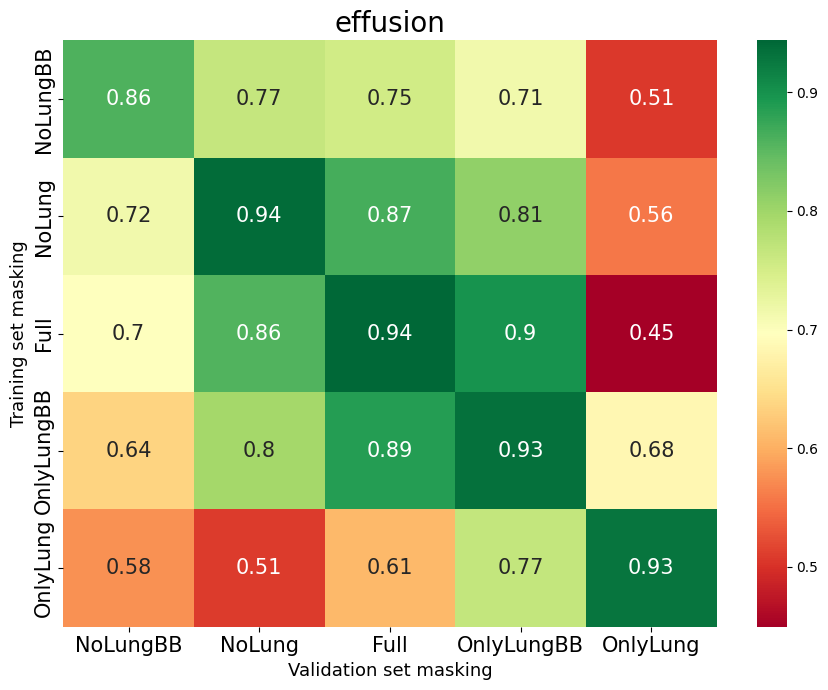

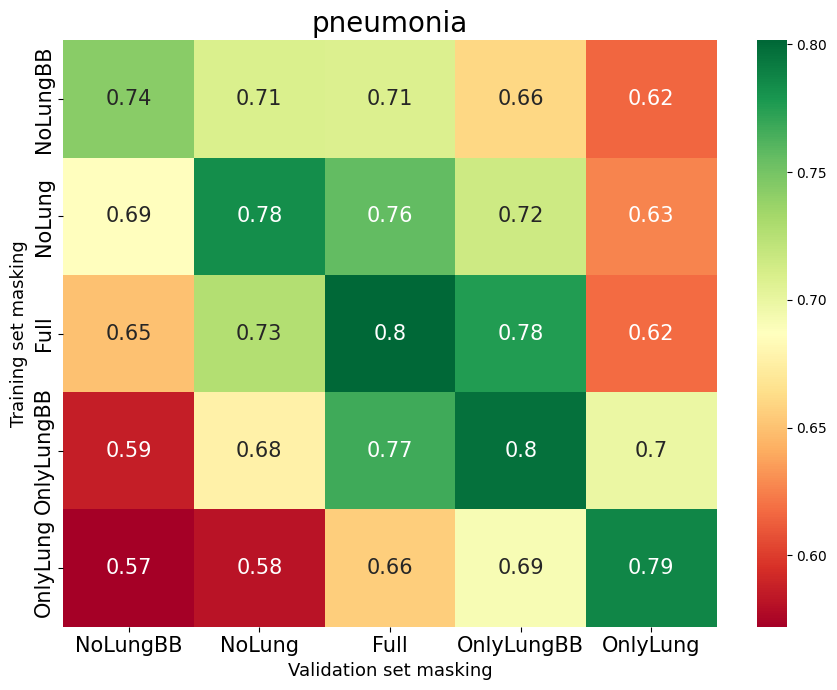

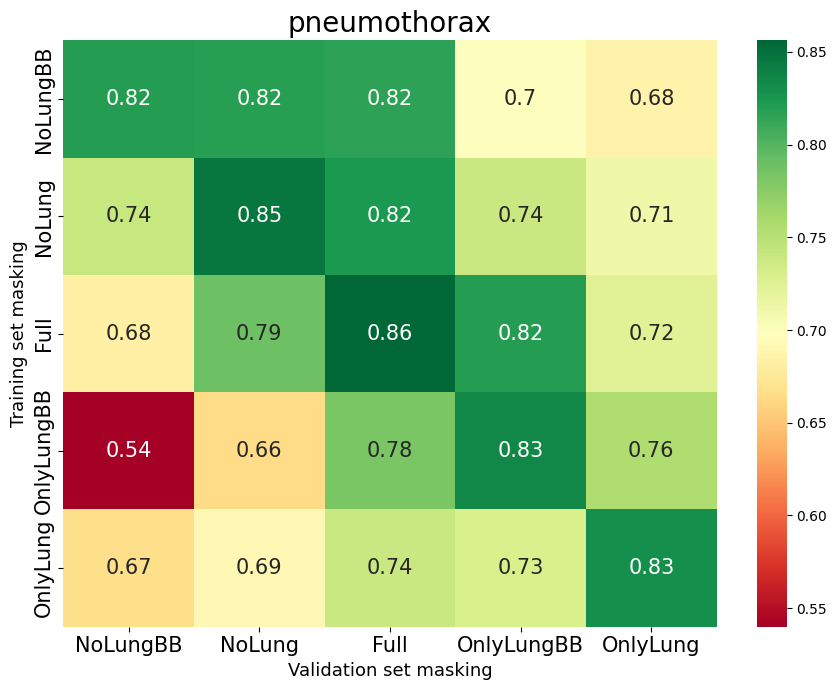

In [23]:
for class_label in mean_auc_per_class.index.get_level_values('class').unique():
    result_class = mean_auc_per_class[mean_auc_per_class.index.get_level_values('class').isin([class_label])].droplevel(0)
    result_class = result_class.reset_index().pivot(columns='valid_set',index='training_set',values='auc')
    result_class = result_class[["NoLungBB","NoLung","Normal","OnlyLungBB","OnlyLung"]]
    plt.figure(figsize=(9,7))
    plt.title(class_label,size=20)
    heatmap = sns.heatmap(result_class, annot=True,cmap="RdYlGn",annot_kws={"size": 15},xticklabels=["NoLungBB","NoLung","Full","OnlyLungBB","OnlyLung"],yticklabels=["NoLungBB","NoLung","Full","OnlyLungBB","OnlyLung"])
    heatmap.yaxis.set_tick_params(labelsize = 15)
    heatmap.xaxis.set_tick_params(labelsize = 15)
    plt.xlabel('Validation set masking', fontsize=13)
    plt.ylabel('Training set masking', fontsize=13)
    plt.tight_layout()
    plt.savefig(f"../reports/figures/mean_auc_{class_label}.png",format='png')
    plt.show()

## Test set

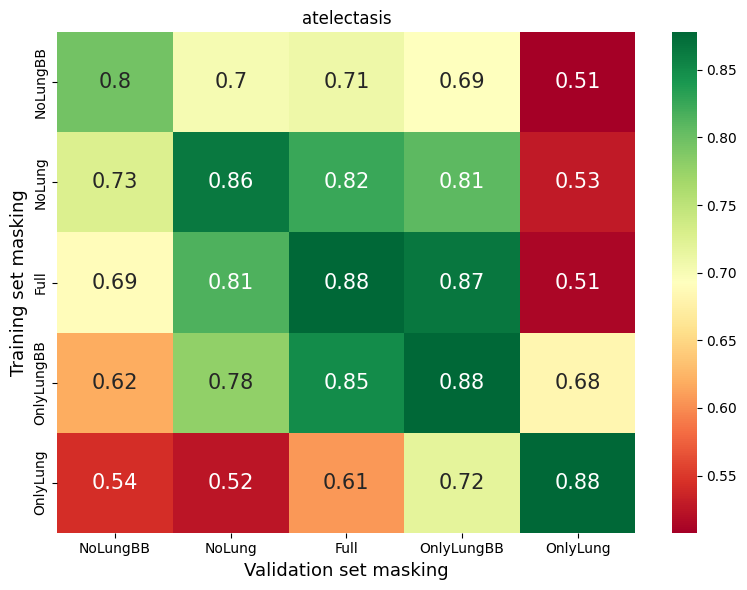

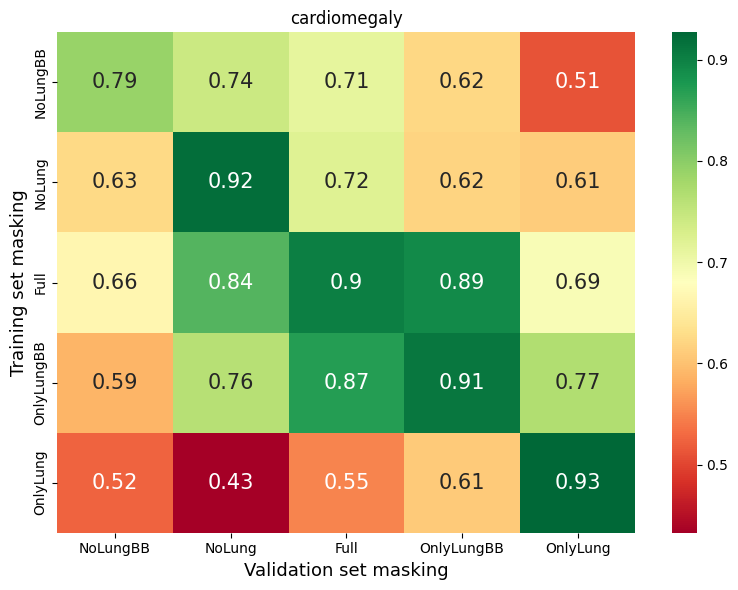

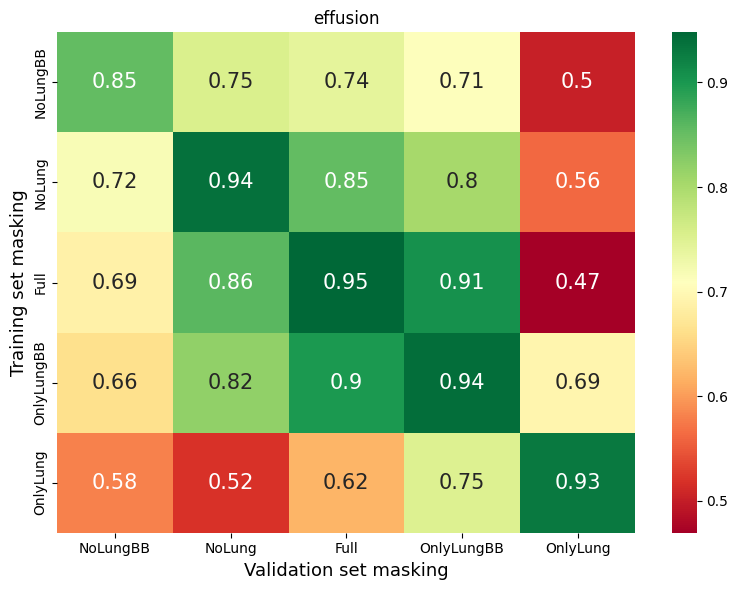

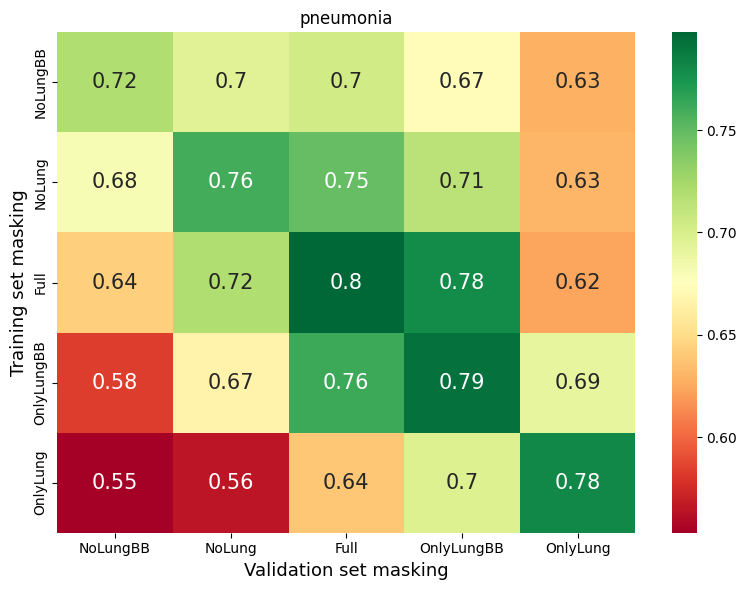

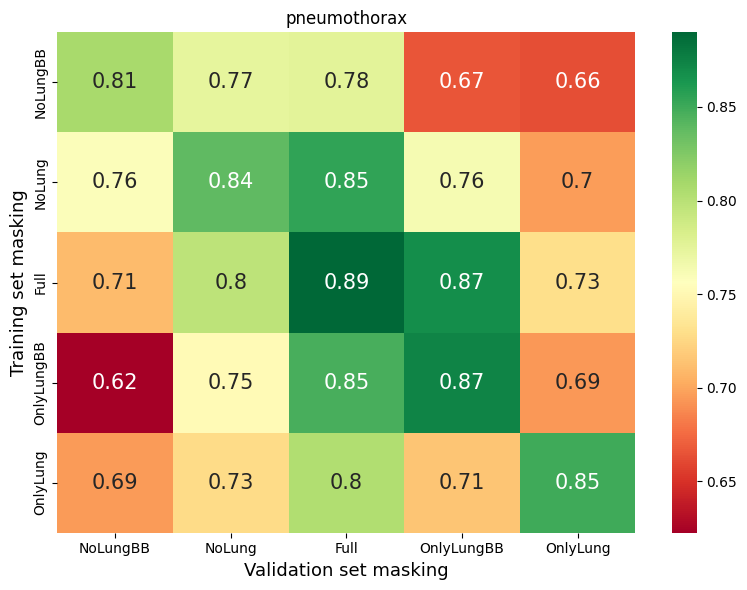

In [26]:
data = pd.read_csv("../data/interim/test_results.csv")
mean_auc_per_class = data.groupby(["class","training_set","valid_set"])["auc"].mean()
for class_label in mean_auc_per_class.index.get_level_values('class').unique():
    result_class = mean_auc_per_class[mean_auc_per_class.index.get_level_values('class').isin([class_label])].droplevel(0)
    result_class = result_class.reset_index().pivot(columns='valid_set',index='training_set',values='auc')
    result_class = result_class[["NoLungBB","NoLung","Normal","OnlyLungBB","OnlyLung"]]
    plt.figure(figsize=(8,6))
    plt.title(class_label)
    sns.heatmap(result_class, annot=True,cmap="RdYlGn",annot_kws={"size": 15},xticklabels=["NoLungBB","NoLung","Full","OnlyLungBB","OnlyLung"],yticklabels=["NoLungBB","NoLung","Full","OnlyLungBB","OnlyLung"])
    plt.xlabel('Validation set masking', fontsize=13)
    plt.ylabel('Training set masking', fontsize=13)
    plt.tight_layout()
    plt.savefig(f"../reports/figures/test_mean_auc_{class_label}.png",format='png')
    plt.show()

## Results on CXR14

In [2]:
data = pd.read_csv("../data/interim/cxr14_results.csv")
data

,training_set,class,fold,auc
0,NormalDataset,cardiomegaly,0,0.741098
1,NormalDataset,pneumonia,0,0.630249
2,NormalDataset,atelectasis,0,0.596219
3,NormalDataset,pneumothorax,0,0.583132
4,NormalDataset,effusion,0,0.723746
...,...,...,...,...
120,OnlyLungBBDataset_0,cardiomegaly,4,0.655877
121,OnlyLungBBDataset_0,pneumonia,4,0.601059
122,OnlyLungBBDataset_0,atelectasis,4,0.597152
123,OnlyLungBBDataset_0,pneumothorax,4,0.514649


In [3]:
mean_auc_per_class = data.groupby(["class","training_set"])["auc"].mean()
mean_auc_per_class

class         training_set       
atelectasis   NoLungBBDataset_0      0.525619
              NoLungDataset_0        0.523533
              NormalDataset          0.592248
              OnlyLungBBDataset_0    0.598560
              OnlyLungDataset_0      0.538753
cardiomegaly  NoLungBBDataset_0      0.536169
              NoLungDataset_0        0.541185
              NormalDataset          0.720429
              OnlyLungBBDataset_0    0.666953
              OnlyLungDataset_0      0.580648
effusion      NoLungBBDataset_0      0.578209
              NoLungDataset_0        0.632242
              NormalDataset          0.722355
              OnlyLungBBDataset_0    0.667525
              OnlyLungDataset_0      0.532623
pneumonia     NoLungBBDataset_0      0.516783
              NoLungDataset_0        0.549205
              NormalDataset          0.618347
              OnlyLungBBDataset_0    0.589139
              OnlyLungDataset_0      0.549127
pneumothorax  NoLungBBDataset_0      0.544926


In [4]:
std_auc_per_class = data.groupby(["class","training_set"])["auc"].std()
std_auc_per_class

class         training_set       
atelectasis   NoLungBBDataset_0      0.003675
              NoLungDataset_0        0.004926
              NormalDataset          0.004206
              OnlyLungBBDataset_0    0.002384
              OnlyLungDataset_0      0.013472
cardiomegaly  NoLungBBDataset_0      0.026384
              NoLungDataset_0        0.022164
              NormalDataset          0.016059
              OnlyLungBBDataset_0    0.012129
              OnlyLungDataset_0      0.022428
effusion      NoLungBBDataset_0      0.004870
              NoLungDataset_0        0.004447
              NormalDataset          0.001819
              OnlyLungBBDataset_0    0.008795
              OnlyLungDataset_0      0.020941
pneumonia     NoLungBBDataset_0      0.009129
              NoLungDataset_0        0.018179
              NormalDataset          0.011773
              OnlyLungBBDataset_0    0.011374
              OnlyLungDataset_0      0.013504
pneumothorax  NoLungBBDataset_0      0.016267
